The malware industry continues to be a well-organized, well-funded market dedicated to evading traditional security measures. Once a computer is infected by malware, criminals can hurt consumers and enterprises in many ways. As one part of their overall strategy for doing so, Microsoft is challenging the data science community to develop techniques to predict if a machine will soon be hit with malware.

Can you help protect 10000 machines from damage BEFORE it happens?

In [45]:
import pandas as pd
malware=pd.read_csv("malware.csv")

## Step 2: Please preprocess your dataset

<p>The last column <mark>'HasDetections'</mark> is the response</p>

Type Markdown and LaTeX:  𝛼2

In [46]:
### Check the shape of the malware dataset
print(malware.shape)

(10000, 18)


In [47]:
# Check the data in the malware dataset
print(malware.head(3))

   Unnamed: 0  Unnamed: 0.1   ProductName  AVProductStatesIdentifier  HasTpm  \
0           0             0  win8defender                    53447.0       1   
1           1             1  win8defender                    53447.0       1   
2           2             2  win8defender                    53447.0       1   

   CountryIdentifier  LocaleEnglishNameIdentifier   Platform Processor  \
0                 29                          171  windows10       x64   
1                 93                           64  windows10       x64   
2                 86                           49  windows10       x64   

   Firewall  Census_HasOpticalDiskDrive  Census_IsSecureBootEnabled  \
0       1.0                           0                           0   
1       1.0                           0                           0   
2       1.0                           0                           0   

   Census_IsVirtualDevice  Census_IsTouchEnabled  Census_IsPenCapable  \
0                     0.

In [48]:
# Print the columns in the dataset
print(malware.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ProductName',
       'AVProductStatesIdentifier', 'HasTpm', 'CountryIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'Firewall',
       'Census_HasOpticalDiskDrive', 'Census_IsSecureBootEnabled',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled',
       'Census_IsPenCapable', 'Wdft_IsGamer', 'IsProtected', 'HasDetections'],
      dtype='object')


In [49]:
# Check if there any null values in the malware
print(malware.isnull().sum())

Unnamed: 0                     0
Unnamed: 0.1                   0
ProductName                    0
AVProductStatesIdentifier      0
HasTpm                         0
CountryIdentifier              0
LocaleEnglishNameIdentifier    0
Platform                       0
Processor                      0
Firewall                       0
Census_HasOpticalDiskDrive     0
Census_IsSecureBootEnabled     0
Census_IsVirtualDevice         0
Census_IsTouchEnabled          0
Census_IsPenCapable            0
Wdft_IsGamer                   0
IsProtected                    0
HasDetections                  0
dtype: int64


In [50]:
# Check the datatypes of the dataset
print(malware.dtypes)

Unnamed: 0                       int64
Unnamed: 0.1                     int64
ProductName                     object
AVProductStatesIdentifier      float64
HasTpm                           int64
CountryIdentifier                int64
LocaleEnglishNameIdentifier      int64
Platform                        object
Processor                       object
Firewall                       float64
Census_HasOpticalDiskDrive       int64
Census_IsSecureBootEnabled       int64
Census_IsVirtualDevice         float64
Census_IsTouchEnabled            int64
Census_IsPenCapable              int64
Wdft_IsGamer                   float64
IsProtected                    float64
HasDetections                    int64
dtype: object


In [51]:
# Check the info of the malware
print(malware.head(10))

   Unnamed: 0  Unnamed: 0.1   ProductName  AVProductStatesIdentifier  HasTpm  \
0           0             0  win8defender                    53447.0       1   
1           1             1  win8defender                    53447.0       1   
2           2             2  win8defender                    53447.0       1   
3           3             3  win8defender                    53447.0       1   
4           4             4  win8defender                    53447.0       1   
5           5             5  win8defender                    53447.0       1   
6           6             6  win8defender                    43927.0       1   
7           7             7  win8defender                    53447.0       1   
8           8             8  win8defender                    53447.0       1   
9           9             9  win8defender                    46413.0       1   

   CountryIdentifier  LocaleEnglishNameIdentifier   Platform Processor  \
0                 29                         

In [52]:
# Check the unique values in the dataset
print(malware.nunique())

Unnamed: 0                     10000
Unnamed: 0.1                   10000
ProductName                        2
AVProductStatesIdentifier        493
HasTpm                             2
CountryIdentifier                199
LocaleEnglishNameIdentifier      137
Platform                           3
Processor                          3
Firewall                           2
Census_HasOpticalDiskDrive         2
Census_IsSecureBootEnabled         2
Census_IsVirtualDevice             2
Census_IsTouchEnabled              2
Census_IsPenCapable                2
Wdft_IsGamer                       2
IsProtected                        2
HasDetections                      2
dtype: int64


In [53]:
# As there no null values and no data type conversions in the malware dataset. 
# Continuing further to drop the features as there not giving any information
malware.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [54]:
malware.columns

Index(['ProductName', 'AVProductStatesIdentifier', 'HasTpm',
       'CountryIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'Firewall', 'Census_HasOpticalDiskDrive',
       'Census_IsSecureBootEnabled', 'Census_IsVirtualDevice',
       'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Wdft_IsGamer',
       'IsProtected', 'HasDetections'],
      dtype='object')

In [55]:
# As we have the train the model in the numeric format convert all the data in the string to the numeric format.
# For this use the encoding techniques. Use the one hot encoding for the ProductName, Platform and Processor
malware_prod_enc=pd.get_dummies(malware,columns=["ProductName","Platform","Processor"])
malware=pd.concat([malware_prod_enc],axis=1)
malware.columns

Index(['AVProductStatesIdentifier', 'HasTpm', 'CountryIdentifier',
       'LocaleEnglishNameIdentifier', 'Firewall', 'Census_HasOpticalDiskDrive',
       'Census_IsSecureBootEnabled', 'Census_IsVirtualDevice',
       'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Wdft_IsGamer',
       'IsProtected', 'HasDetections', 'ProductName_mse',
       'ProductName_win8defender', 'Platform_windows10', 'Platform_windows7',
       'Platform_windows8', 'Processor_arm64', 'Processor_x64',
       'Processor_x86'],
      dtype='object')

In [56]:
print(malware.AVProductStatesIdentifier.nunique())

493


In [57]:
# Check the variance and the correlation
temp_corr=malware.corr()
print(temp_corr["HasDetections"].sort_values(ascending=False))

HasDetections                  1.000000
AVProductStatesIdentifier      0.119497
IsProtected                    0.066309
Processor_x64                  0.066173
Wdft_IsGamer                   0.046779
LocaleEnglishNameIdentifier    0.030183
ProductName_win8defender       0.019231
Census_HasOpticalDiskDrive     0.010411
Platform_windows10             0.008013
Firewall                       0.003206
HasTpm                         0.002542
Census_IsSecureBootEnabled    -0.003242
Census_IsPenCapable           -0.003655
Platform_windows8             -0.003940
CountryIdentifier             -0.008076
Processor_arm64               -0.014254
ProductName_mse               -0.019231
Platform_windows7             -0.019231
Census_IsTouchEnabled         -0.052119
Census_IsVirtualDevice        -0.055882
Processor_x86                 -0.065533
Name: HasDetections, dtype: float64


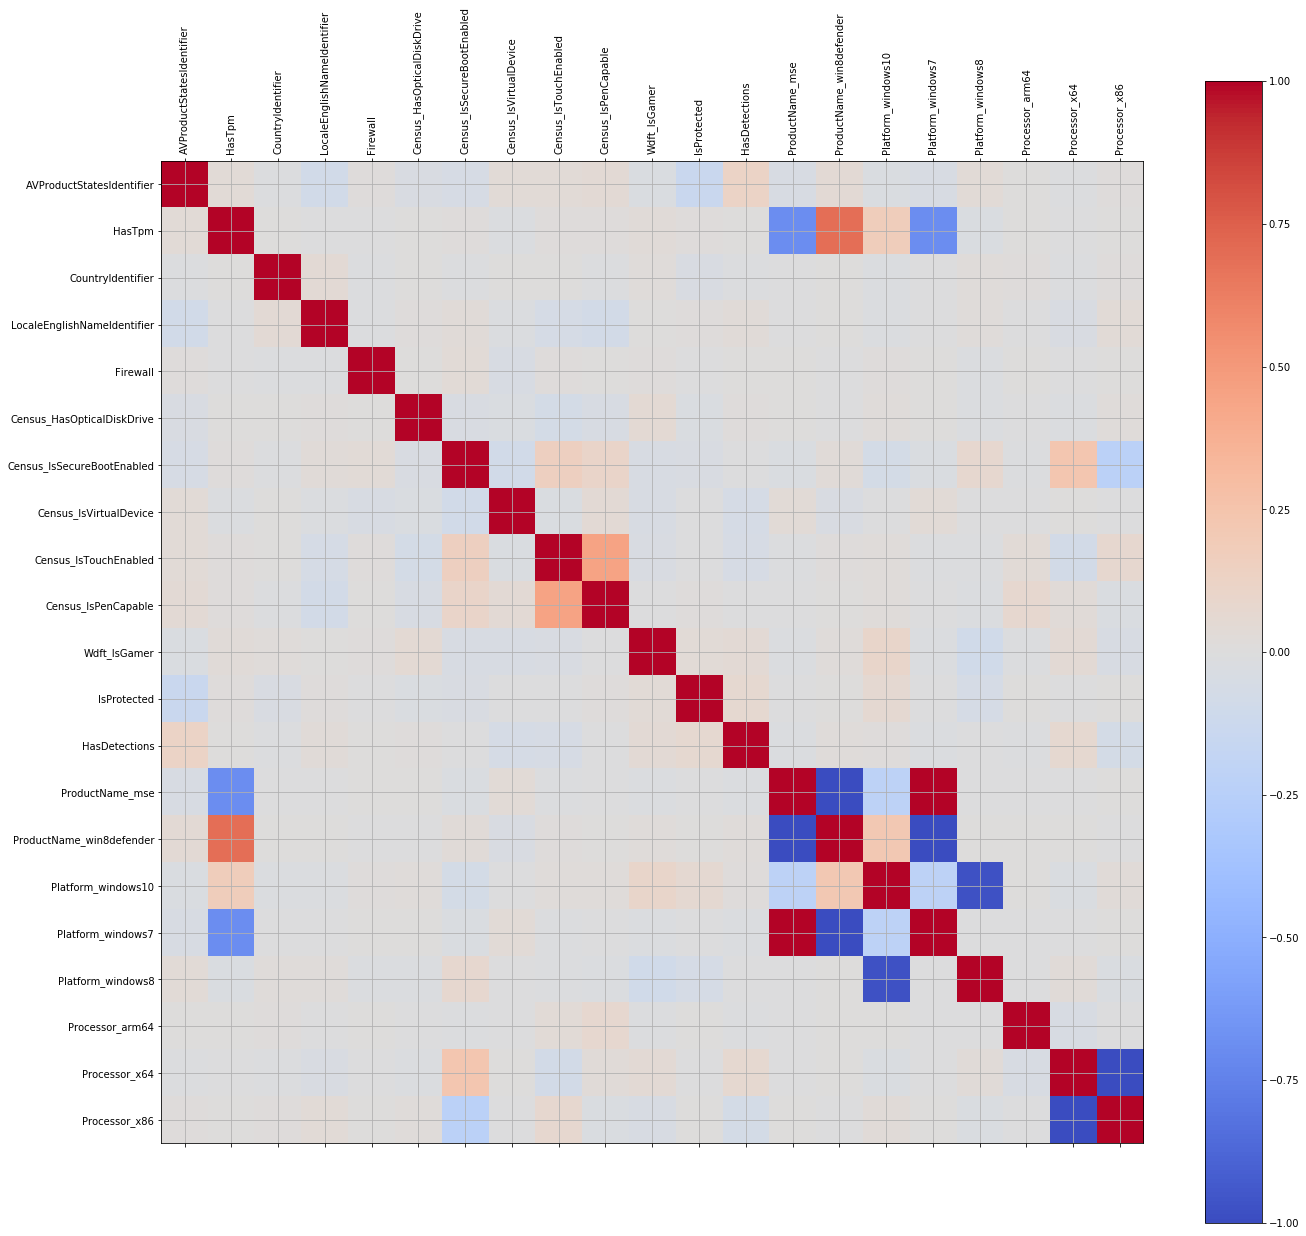

In [58]:
# To check how columns are interdependent on one another we can use the heatmap
import numpy as np
import matplotlib.pyplot as plt
corr = malware.corr()
fig = plt.figure(figsize=(22,21))
ax = fig.add_subplot(111)
ax.grid(True)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [59]:
# From the graph found that the Census_IsPenCapable and the Census_IsTouchEnabled so drop one column
to_drop=["Census_IsTouchEnabled","Census_IsVirtualDevice"]
malware.drop(to_drop,axis=1,inplace=True)

## Step 3: Split your dataset into Training data and Test data

In [60]:
X = malware.drop(["HasDetections"],axis = 1)
y = malware["HasDetections"]
from sklearn.model_selection import train_test_split 
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.3,stratify=y)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit knn to the training sets
knn.fit(train_X, train_y)
# Print the score of knn on the train sets
print(knn.score(train_X, train_y))

0.6717142857142857


## Step 4: Analyze the data with three different models

### Model 1 implementing the KNN:

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [80]:
# Predicting the Test set results
y_pred = knn.predict(test_X)
# Making the Confusion Matrix
#Print the confusion Matirx
cm = confusion_matrix(test_y, y_pred)
print("================")
print("Confusion Matrix")
print("================")
print(cm)

Confusion Matrix
[[790 698]
 [646 866]]


In [79]:
print("=======")
print("Reports")
print("=======")
report = classification_report(test_y, y_pred)
print(report)

Reports
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      1488
           1       0.53      0.53      0.53      1512

   micro avg       0.53      0.53      0.53      3000
   macro avg       0.53      0.53      0.53      3000
weighted avg       0.53      0.53      0.53      3000



### Model 2 implementing the Decision Tree:

In [78]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_X, train_y)
# Predicting the test set
y_pred = clf_dt.predict(test_X)
cm = confusion_matrix(test_y, y_pred)
print("================")
print("Confusion Matrix")
print("================")
print(cm)

Confusion Matrix
[[782 706]
 [711 801]]


In [76]:
print("=======")
print("Reports")
print("=======")
report = classification_report(test_y, y_pred)
print(report)

Reports
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      1488
           1       0.55      0.57      0.56      1512

   micro avg       0.55      0.55      0.55      3000
   macro avg       0.55      0.55      0.55      3000
weighted avg       0.55      0.55      0.55      3000



### Model 3 implementing the Naive Bayes:

In [81]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)
# Predicting the test set
y_pred = nb_clf.predict(test_X)
cm = confusion_matrix(test_y, y_pred)
print("================")
print("Confusion Matrix")
print("================")
print(cm)

Confusion Matrix
[[ 340 1148]
 [ 192 1320]]


In [82]:
print("=======")
print("Reports")
print("=======")
report = classification_report(test_y, y_pred)
print(report)

Reports
              precision    recall  f1-score   support

           0       0.64      0.23      0.34      1488
           1       0.53      0.87      0.66      1512

   micro avg       0.55      0.55      0.55      3000
   macro avg       0.59      0.55      0.50      3000
weighted avg       0.59      0.55      0.50      3000



## Step 5: Results Evaluation Table

<table>
    <thead>
        <tr>
            <th></th>
            <th>KNN</th>
            <th>NB</th>
            <th>DT</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Accuracy</td>
            <td>0.53</td>
            <td>0.55</td>
            <td>0.55</td>
        </tr>
        <tr>
            <td>Weighted Precision</td>
            <td>0.53</td>
            <td>0.55</td>
            <td>0.59</td>
        </tr>
        <tr>
            <td>Weighted Recall</td>
            <td>0.53</td>
            <td>0.55</td>
            <td>0.55</td>   
        </tr>
    </tbody>
</table>